# Boston Housing Data

The Boston Housing dataset is a classic example used in Machine Learning. This dataset contains information collected in the 1970's by the U.S Census Service concerning housing in the area of Boston. It consists of 13 features and a target (the housing price in $1000's). There are 506 instances.

The objective of this tutorial is to build a linear model to predict the homes price given a set of feature. 

Feature Information:

    0. CRIM      per capita crime rate by town
    1. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    2. INDUS     proportion of non-retail business acres per town
    3. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    4. NOX       nitric oxides concentration (parts per 10 million)
    5. RM        average number of rooms per dwelling
    6. AGE       proportion of owner-occupied units built prior to 1940
    7. DIS       weighted distances to five Boston employment centres
    8. RAD       index of accessibility to radial highways
    9. TAX      full-value property-tax rate per \$10,000
    10. PTRATIO  pupil-teacher ratio by town
    11. B        1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town
    12. LSTAT    % lower status of the population

Target:
    0. Price     Median value of owner-occupied homes in $1000's

Example: https://machinelearningmastery.com/ridge-regression-with-python/

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
        
About Kfold CV: https://machinelearningmastery.com/k-fold-cross-validation/

## Import libraries

Libraries needed for this exercice.

In [2]:
import numpy as np

from pandas import read_csv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import 

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

## 1. Load the dataset

We will import the housing data from the scikit-learn library, then we load the data into a pandas dataframe using pd.DataFrame.

a) How many lines and column does this dataset have ? Show the first 5 examples.

b) Check there are no missing values. For this use `isnull().sum()` function.

In [3]:
import pandas as pd
from sklearn.datasets import load_boston

# Load data
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.insert(0, 'Price', boston.target)

# a) Show some examples

print("The number of rows of the dataset", len(boston_df))
print("The number of columns of the dataset", len(boston_df.columns))
print("The first 5 entries:\n", boston_df.loc[:4])

# b) Check if there are any missing values

print(boston_df.isnull().sum())


The number of rows of the dataset 506
The number of columns of the dataset 14
The first 5 entries:
    Price     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0   24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1   21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2   34.7  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3   33.4  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4   36.2  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


/home/daniel/miniconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

## 2. Data exploration

We first assign features values to numpy array $X$ and target values to numpy array $y$

a) check the dimension of $X$ and $y$

b) Make histograms for each features and for the target

c) Show scatter plots of each feature vs the target (optional: calculate correlation coefficient)

(506, 13) (506, 1)


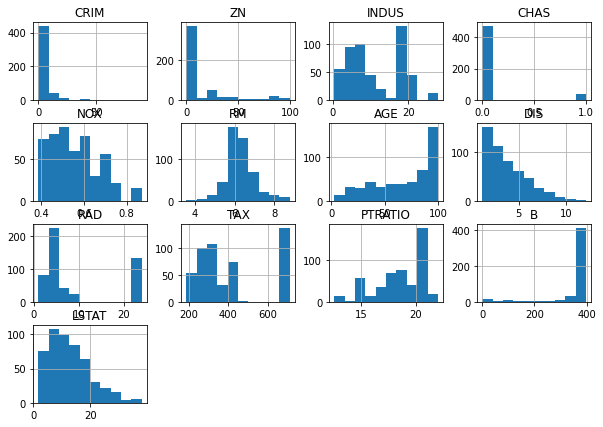

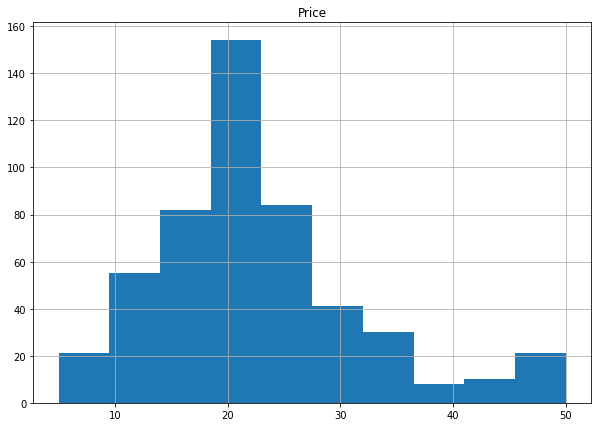

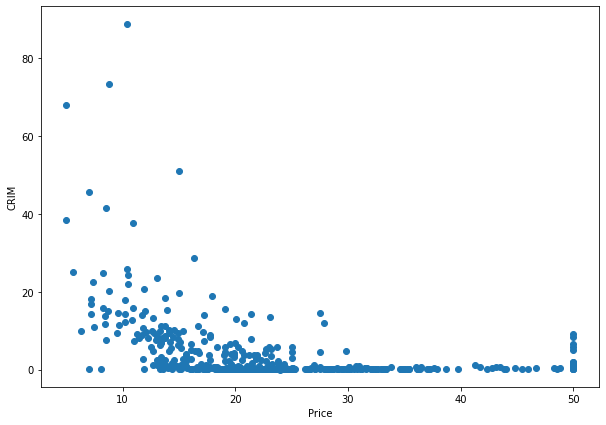

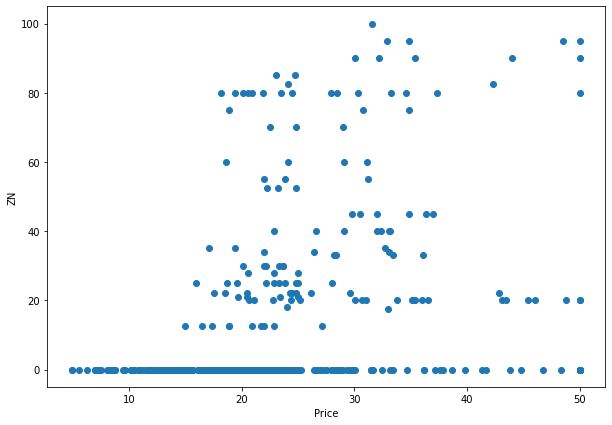

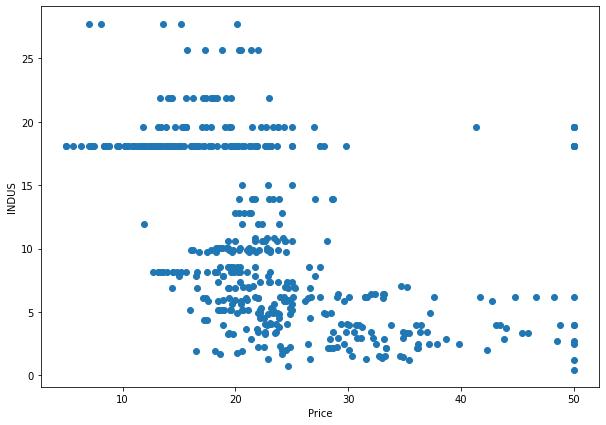

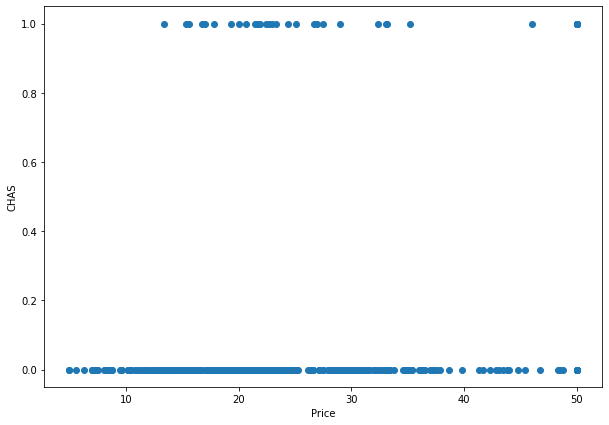

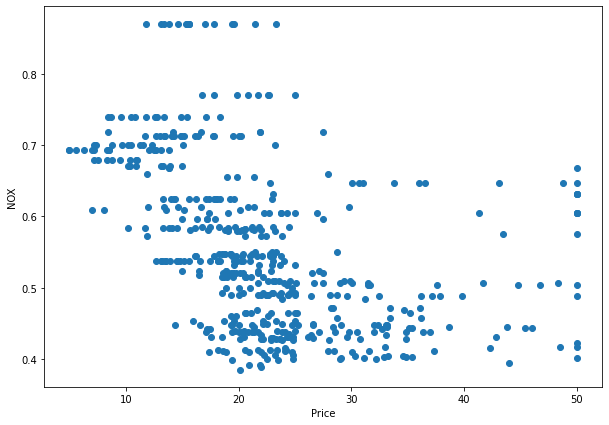

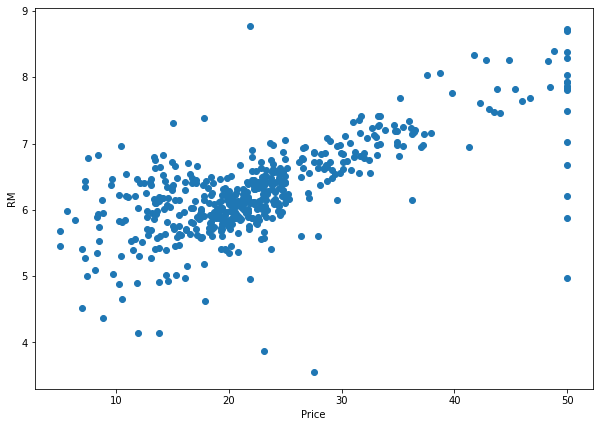

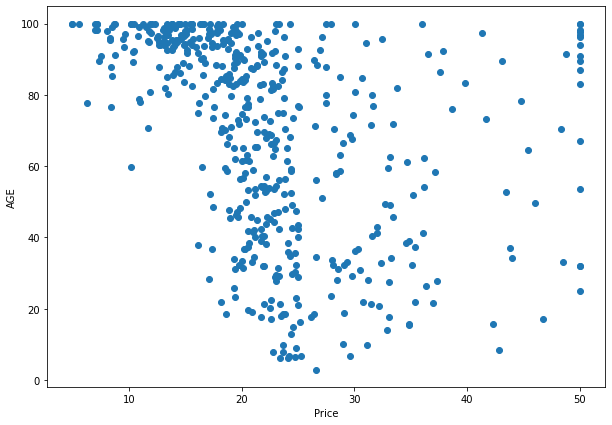

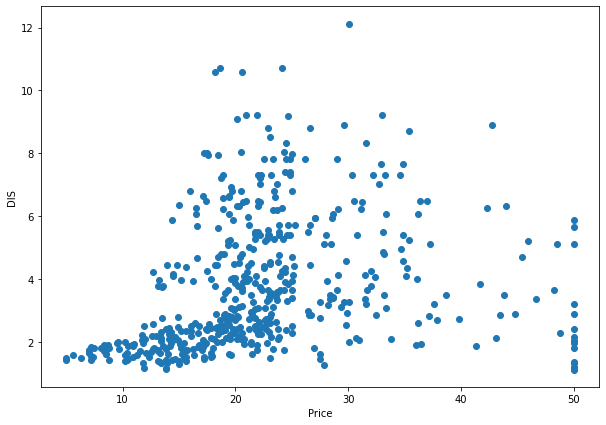

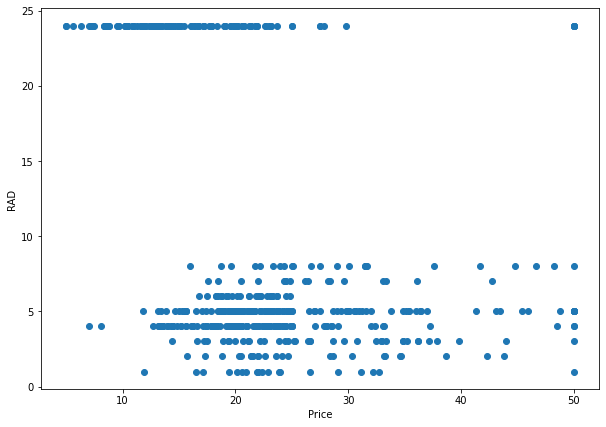

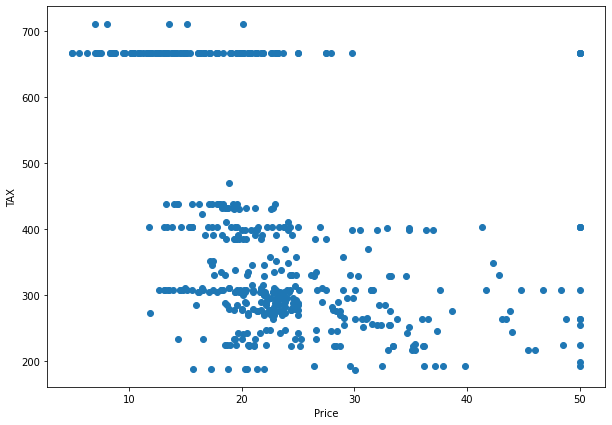

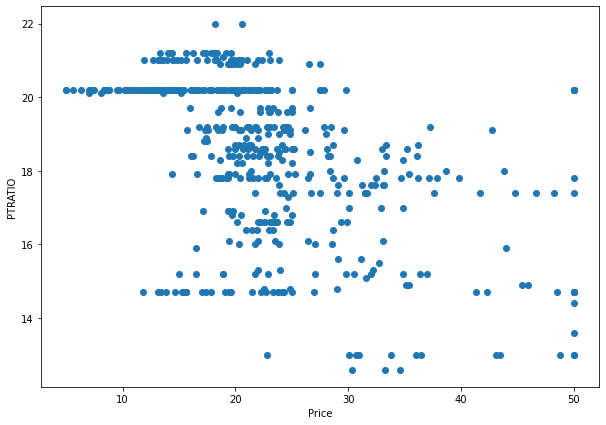

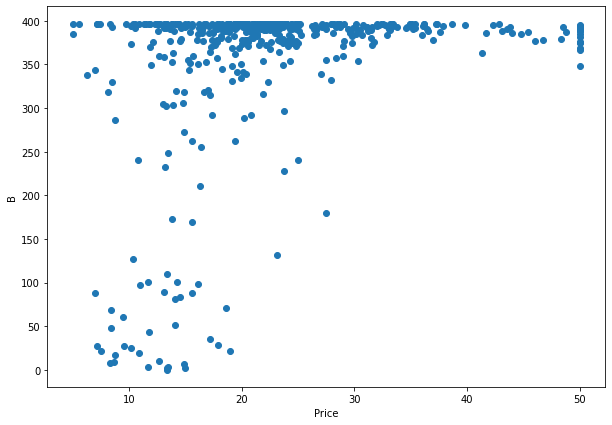

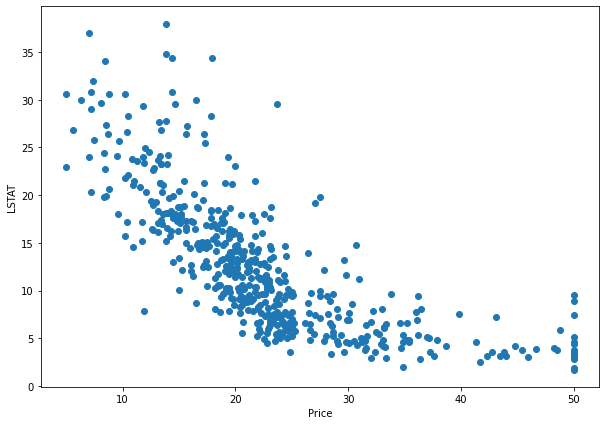

In [15]:
X = boston_df.loc[:, boston_df.columns != 'Price'].copy() # Features
y = boston_df.loc[:, boston_df.columns == 'Price'].copy() # Target

# a) X and y dimensions
print(X.shape, y.shape)

# b) Show histograms
X.hist()
y.hist()

# c) Scatter plots
X_arr = boston.data
y_arr = boston.target
for i in range(X.shape[1]):
    plt.figure()
    plt.scatter(y_arr, X_arr[:, i])
    plt.ylabel(list(X.columns)[i])
    plt.xlabel(y.columns[0])

## 3. Split data in train and test samples

We now split the total dataset in a train and a test sample using scikit-learn.

Look at the size of each sample.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)



## 4. Linear regression

Now let's construct a predictive model using linear regression:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i$$

For this we use the scikit-learn model described here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

a) Fit the linear regression model using the training dataset and print the parameters (weights and bias term) of the fit.

b) Get the predicted model output, `y_train_pred`, using the training dataset. Make a scatter plot of the true target value, `y_train`, vs the predicted value, `y_train_pred`.

c) Calculate the root mean square error (RMS) between `y_train` and `y_train_pred`. For this you can use the scikit-learn function `mean_squared_error()`.

d) Finally we apply the model to the test dataset: repeat steps b) and c) with the test sample. Do you think that the model is acceptable ? Is there an overfitting problem ?

Weights: [[-1.23897571e-01  4.81822924e-02 -4.74497796e-02  3.36938950e+00
  -1.56635488e+01  3.59419367e+00 -9.33206067e-03 -1.47089101e+00
   3.05053544e-01 -1.08397039e-02 -9.08791339e-01  1.00352939e-02
  -4.77714677e-01]] 
 Bias term: [35.86168335]
RMS of training sample: 4.838505214475637
RMS of testing sample: 4.116196425564971


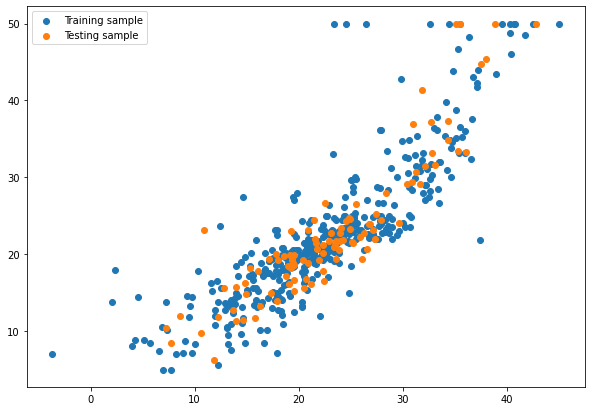

In [ ]:
# Fit of the model
model1 = LinearRegression()
 
model1.fit(X_train, y_train)
print('Weights:', model1.coef_, '\n', 'Bias term:', model1.intercept_)
y_train_pred = model1.predict(X_train)
plt.scatter(y_train_pred, y_train, label='Training sample')
print('RMS of training sample:', mean_squared_error(y_train_pred, y_train, squared=False))

y_test_pred = model1.predict(X_test)
plt.scatter(y_test_pred, y_test, label='Testing sample')
print('RMS of testing sample:', mean_squared_error(y_test_pred, y_test, squared=False))

plt.legend()

## 5. Ridge penalty (a.k.a L2 norm)

Let's see if a penalized linear algorithm can improve the modelling and prediction of the data. For this we use Ridge regression (also called L2 norm) which adds a penalty term to the fit model:

$$y_{pred} = w_0 + \sum_{i=1}^{N=13} w_i X_i + \lambda \sum_{i=0}^{N=13} w_i^2$$

See the scikit-learn implementation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

a) Train the model using the training dataset and a $\lambda$ regularization parameter =1

b) Apply the algorithm to the test data and check the quality of the model. Do you see any improvement in the data modelling and prediction ? Try other values of $\lambda$.

c) Optional, try Lasso penalty: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html. Does it help ?

Ridge regression
Weights: [[-1.23342075e-01  4.82400271e-02 -5.25227659e-02  3.34739503e+00
  -1.44575469e+01  3.60524537e+00 -1.04168805e-02 -1.45215651e+00
   3.01632788e-01 -1.08787225e-02 -8.94563535e-01  1.00861761e-02
  -4.79620573e-01]] 
 Bias term: [34.9751467]
RMS of testing sample: 4.125290784483023

Lasso regression
Weights: [-0.11469086  0.04982345 -0.09373167  1.60847689 -0.          3.51494142
 -0.01888261 -1.18575423  0.26859655 -0.01204955 -0.73803508  0.01068735
 -0.52980413] 
 Bias term: [25.96325374]
RMS of testing sample: 4.28492653837698


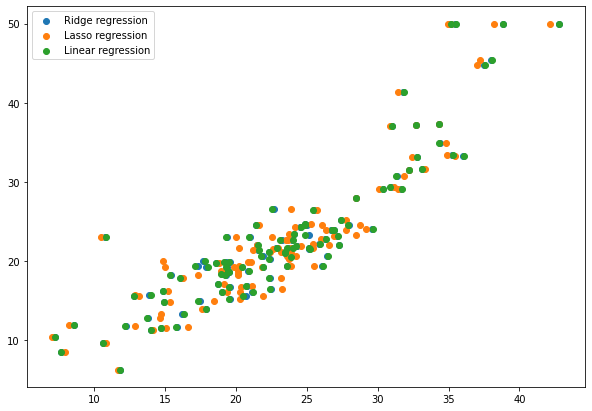

In [ ]:
# define model
model2 = Ridge(alpha=0.1) # Alpha sets the lambda (yes...) hyperparameter 
model3 = Lasso(alpha=0.1)

model2.fit(X_train, y_train)
print('Ridge regression')
print('Weights:', model2.coef_, '\n', 'Bias term:', model2.intercept_)

ridge_test_pred = model2.predict(X_test)

print('RMS of testing sample:', mean_squared_error(ridge_test_pred, y_test, squared=False))

model3.fit(X_train, y_train)
print('\nLasso regression')
print('Weights:', model3.coef_, '\n', 'Bias term:', model3.intercept_)

lasso_test_pred = model3.predict(X_test)

print('RMS of testing sample:', mean_squared_error(lasso_test_pred, y_test, squared=False))

plt.scatter(ridge_test_pred, y_test, label='Ridge regression')
plt.scatter(lasso_test_pred, y_test, label='Lasso regression')
plt.scatter(y_test_pred, y_test, label='Linear regression')
plt.legend()

## 6. Estimating model performance: Cross-validation

Instead of splitting the dataset in one training and one test samples we can use cross-validation to better determine the performance of a fit model. For this we apply the following [procedure](https://machinelearningmastery.com/k-fold-cross-validation/):
- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
  - Take the group as test data set
  - Take the k-1 remaining groups as a training data set
  - Fit a model on the training set and evaluate it on the test set
  - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

a) Look at the example below, what are the different parameters ? To what corresponds the output ?

b) Apply the cross-validation to the other models. Can you say if one is more performant than the other ?


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

print('Linear regression')
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model1, X, y, scoring='neg_mean_squared_error', cv=cv)
scores = np.absolute(scores)
print('Mean RMS: %.2f +- %.2f' % (np.mean(np.sqrt(scores)),np.std(np.sqrt(scores))))

print('\nRidge regression')
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model2, X, y, scoring='neg_mean_squared_error', cv=cv)
scores = np.absolute(scores)
print('Mean RMS: %.2f +- %.2f' % (np.mean(np.sqrt(scores)),np.std(np.sqrt(scores))))

print('\nLasso regression')
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model3, X, y, scoring='neg_mean_squared_error', cv=cv)
scores = np.absolute(scores)
print('Mean RMS: %.2f +- %.2f' % (np.mean(np.sqrt(scores)),np.std(np.sqrt(scores))))

Linear regression
Mean RMS: 5.83 +- 1.78

Ridge regression
Mean RMS: 5.79 +- 1.79

Lasso regression
Mean RMS: 5.62 +- 1.82
